In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('online_foods.csv')

In [3]:
df.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,"12,9766","77,5993",560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,"12,977","77,5773",560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,"12,9551","77,6593",560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,"12,9473","77,5616",560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,"12,985","77,5533",560010,Yes,Positive


In [4]:
df.shape

(388, 12)

In [5]:
df

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,"12,9766","77,5993",560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,"12,977","77,5773",560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,"12,9551","77,6593",560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,"12,9473","77,5616",560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,"12,985","77,5533",560010,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,"12,9766","77,5993",560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,"12,9854","77,7081",560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,"12,985","77,5533",560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,"12,977","77,5773",560009,Yes,Positive


In [6]:
bengaluru_coords = (12.9716, 77.5946)
bengaluru_map = folium.Map(bengaluru_coords, zoom_start = 12)
latitude_s = []
longitude_s = []
coords = []
i = 0

for index, row in df.iterrows():
    folium.Marker([float(row['latitude'].replace(',', '.')), float(row['longitude'].replace(',', '.'))], icon=folium.Icon(color='green' if(row['Feedback'] == 'Positive') else 'red', icon='cloud' if row['Output'] == 'Yes' else 'yaichko'), ).add_to(bengaluru_map)

bengaluru_map.save('map_with_points.html')

In [7]:
bengaluru_map

In [8]:
'''
Так как одни и те же семьи и дома оставляли несколько фидбеков, иконки накладываются друг на друга, стоит рассмотреть negative и positive feedbacks отдельно
'''

'\nТак как одни и те же семьи и дома оставляли несколько фидбеков, иконки накладываются друг на друга, стоит рассмотреть negative и positive feedbacks отдельно\n'

In [11]:
customers = pd.read_csv('customer.csv') #
educational_feedback = pd.read_csv("Educational_Feedback.csv")
family_feedback = pd.read_csv("family_feedback.csv") 
occupation_feedback = pd.read_csv("occupation_feedback.csv")
output_feedback = pd.read_csv("Output_Feedback.csv")
family_size_output = pd.read_csv("Family_size_Output.csv")

In [12]:
family_feedback

,Family_size,Pin_code,Pin_code_instances,Feedback
0,3,560009,16,Positive
1,5,560010,7,Positive
2,3,560085,6,Positive
3,4,560024,6,Positive
4,2,560038,5,Positive
...,...,...,...,...
207,5,560015,1,Positive
208,1,560006,1,Positive
209,2,560006,1,Negative
210,6,560012,1,Negative


In [28]:
map_family_feedback = pd.merge(family_feedback,df[['Pin_code','latitude','longitude']], on="Pin_code")
map_family_feedback= map_family_feedback.drop_duplicates()
map_family_feedback = map_family_feedback.drop('Family_size', axis=1)

In [29]:
map_family_feedback

,Pin_code,Pin_code_instances,Feedback,latitude,longitude
0,560009,16,Positive,"12,977","77,5773"
36,560009,5,Positive,"12,977","77,5773"
72,560009,5,Positive,"12,977","77,5773"
108,560009,4,Positive,"12,977","77,5773"
144,560009,3,Negative,"12,977","77,5773"
...,...,...,...,...,...
1465,560067,1,Positive,"12,9967","77,7582"
1469,560067,1,Positive,"12,9967","77,7582"
1473,560056,1,Positive,"12,9515","77,4921"
1475,560056,1,Positive,"12,9515","77,4921"


In [70]:
negative_map_feedbacks = map_family_feedback[map_family_feedback['Feedback'] != 'Positive']
negative_map_feedbacks = negative_map_feedbacks.drop_duplicates()
negative_map_feedbacks = negative_map_feedbacks.groupby(['Pin_code', 'latitude', 'longitude'])["Pin_code_instances"].sum()
negative_map_feedbacks = pd.DataFrame(negative_map_feedbacks)
negative_map_feedbacks.reset_index(inplace=True)

In [72]:
from folium.plugins import HeatMap
bengaluru_heat_map = folium.Map(bengaluru_coords, zoom_start = 12)
i = 0
for index, row in negative_map_feedbacks.iterrows():
    latitude = float(row['latitude'].replace(',','.'))
    longitude = float(row['longitude'].replace(",", "."))
    HeatMap([[latitude, longitude, row['Pin_code_instances']]]).add_to(bengaluru_heat_map)
    i += 1

bengaluru_heat_map.save("negative_feedbacks.html")
bengaluru_heat_map

In [73]:
educational_feedback

,Educational_Qualifications,Relative_Feedback,Feedback
0,Post Graduate,88.505747,Positive
1,Ph.D,78.260870,Positive
2,Graduate,76.271186,Positive
3,School,75.000000,Positive
4,Uneducated,50.000000,Negative
5,Uneducated,50.000000,Positive
6,School,25.000000,Negative
7,Graduate,23.728814,Negative
8,Ph.D,21.739130,Negative
9,Post Graduate,11.494253,Negative


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

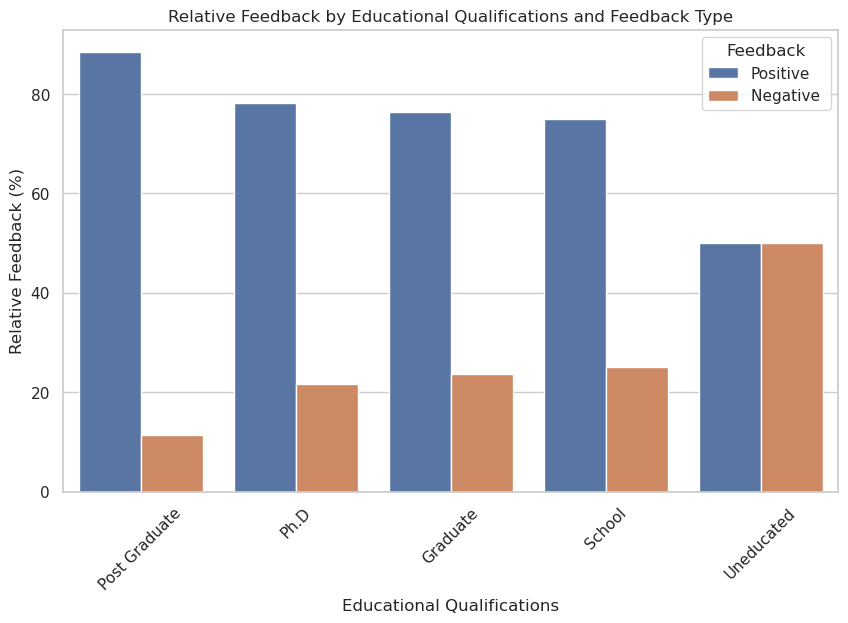

In [74]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x='Educational_Qualifications', y='Relative_Feedback', hue='Feedback', data=educational_feedback)

plt.title('Relative Feedback by Educational Qualifications and Feedback Type')
plt.xlabel('Educational Qualifications')
plt.ylabel('Relative Feedback (%)')
plt.xticks(rotation=45)

In [75]:
customers

,Family_size,Occupation,Marital_Status,Feedback,count(Feedback)
0,3,Student,Single,Positive,56
1,2,Student,Single,Positive,43
2,4,Student,Single,Positive,36
3,5,Student,Single,Positive,25
4,2,Employee,Single,Positive,15
...,...,...,...,...,...
57,4,Employee,Prefer not to say,Positive,1
58,1,Employee,Married,Negative,1
59,5,Student,Married,Positive,1
60,1,Employee,Single,Positive,1


In [76]:
output_feedback

,Output,Feedback,Relative_Output
0,True,Negative,5.980066
1,False,Negative,60.919540
2,True,Positive,94.019934
3,False,Positive,39.080460


In [77]:
family_size_output

,Family_size,Output,Family_size_Output
0,1,True,70.833333
1,1,False,29.166667
2,2,True,78.217822
3,2,False,21.782178
4,3,True,79.487179
5,3,False,20.512821
6,4,True,85.714286
7,4,False,14.285714
8,5,True,74.074074
9,5,False,25.925926


In [80]:
true_fam_size_output = family_size_output[family_size_output['Output'] == True] 
true_fam_size_output = true_fam_size_output.drop('Output', axis=1)
true_fam_size_output.corr()
'''
Слабая обратная коррелятивная связь между размером семьи и output = true, то есть тем, пришла ли еда.
'''

,Family_size,Family_size_Output
Family_size,1.000000,-0.328804
Family_size_Output,-0.328804,1.000000


In [82]:
false_fam_size_output = family_size_output[family_size_output['Output'] == False]
false_fam_size_output = false_fam_size_output.drop('Output', axis=1)
false_fam_size_output.corr()

,Family_size,Family_size_Output
Family_size,1.000000,0.328804
Family_size_Output,0.328804,1.000000


In [83]:
'''
И соответственно, существует прямая коррелятивная связь между размером семьи и тем, пришёл ли заказ.
'''

'\nИ соответственно, существует прямая коррелятивная связь между размером семьи и тем, пришёл ли заказ.\n'

In [84]:
occupation_feedback

,Occupation,Feedback,Percentage_of_Feedback
0,Student,Positive,89.855072
1,House wife,Positive,88.888889
2,Employee,Positive,72.033898
3,Self Employeed,Positive,70.370370
4,Self Employeed,Negative,29.629630
5,Employee,Negative,27.966102
6,House wife,Negative,11.111111
7,Student,Negative,10.144928


In [105]:
occupation_feedback_pivot = occupation_feedback.pivot(index = 'Occupation', columns ='Feedback', values = 'Percentage_of_Feedback')
occupation_feedback_pivot

Feedback,Negative,Positive
Occupation,,
Employee,27.966102,72.033898
House wife,11.111111,88.888889
Self Employeed,29.629630,70.370370
Student,10.144928,89.855072


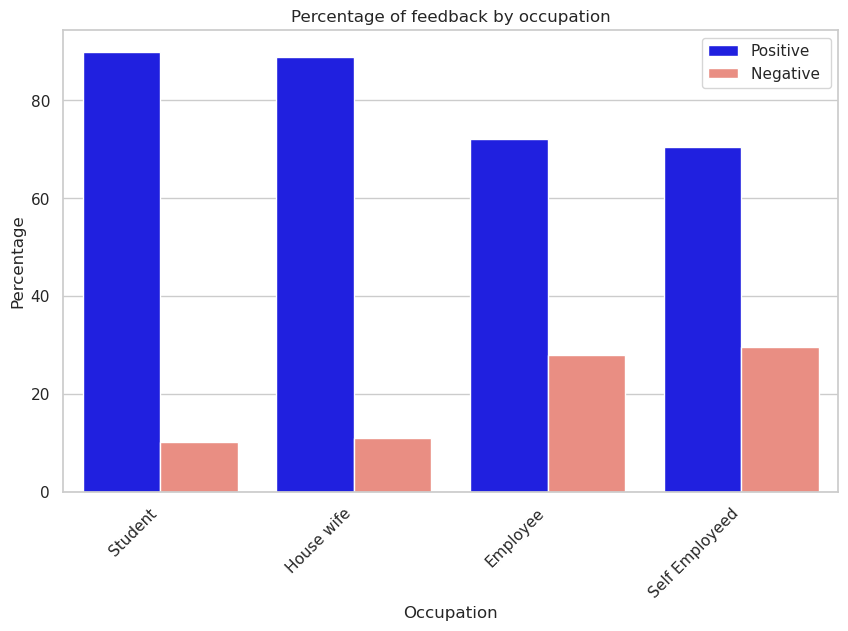

In [109]:
plt.figure(figsize= (10,6))
sns.barplot(x='Occupation', y = 'Percentage_of_Feedback', hue='Feedback', data=occupation_feedback, palette = {'Positive': 'blue', 'Negative ': 'salmon'})
plt.xlabel('Occupation')
plt.ylabel("Percentage")
plt.title('Percentage of feedback by occupation')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

In [85]:
occupation_stats = occupation_feedback.groupby('Occupation')['Percentage_of_Feedback'].agg(['mean', 'std'])

print("Summary Statistics by Occupation:")
print(occupation_stats)

Summary Statistics by Occupation:
                mean        std
Occupation                     
Employee        50.0  31.160638
House wife      50.0  54.997194
Self Employeed  50.0  28.808054
Student         50.0  56.363584
